In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils

2023-04-15 16:05:08.021116: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the dataset
# Dataset available at: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings
df = pd.read_csv("data/Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
### About the dataset ###
# The dataset contains a list of published videogames, core information about the game's year of release, developer, publisher, platform ESRB rating and genre.
# Additionally the dataset contains user & critic scores, and sales numbers divided into the regions: North America, Europe, Japan, Other, and Global.
#
### Columns
# Name - The name of the game.
# Platform - The platform which the game was released on (if a game was released on multiple platforms, each platform appears as a seperate row in the dataset).
# Year_of_Release - The year in which the game was released.
# Genre - The genre of the game.
# Publisher - The company who published the game.
# NA_Sales - The number of copies sold in the North America region (in millions rounded to 2 decimal places).
# EU_Sales - The number of copies sold in the Europe region (in millions rounded to 2 decimal places).
# JP_Sales - The number of copies sold in the Japan region (in millions rounded to 2 decimal places).
# Other_Sales - The number of copies sold outside the NA, EU and JP regions (in millions rounded to 2 decimal places).
# Global_Sales - The total number of copies sold across all regions (in millions rounded to 2 decimal places).
# Critic_Score - The average score given to the game by game critics (0 to 100).
# Critic_Count - The number of critic reviews used to generate the Critic_Score.
# User_Score - The average score given to the game by the players of the game (0.0 to 10.0).
# User_Count - The number of user reviews used to generate the User_Score.
# Developer - The studio who developed the game.
# Rating - The ESRB (Entertainment Software Rating Board) score of the game.

In [4]:
# The dataset has 16719 rows and 16 columns, however some rows have null fields.
# Additionally some values in the User_Score column are given as 'tbd' (to be disclosed), these will be treated as null fields.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
# Remove rows with null fields, leaving us with 6825 rows.
# Convert User_Score column from string to numeric values.
df = df.dropna(how="any")
df["User_Score"] = pd.to_numeric(df["User_Score"])

In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(10), object(6)
memory usage: 906.4+ KB


/tmp/ipykernel_1445/3077160691.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


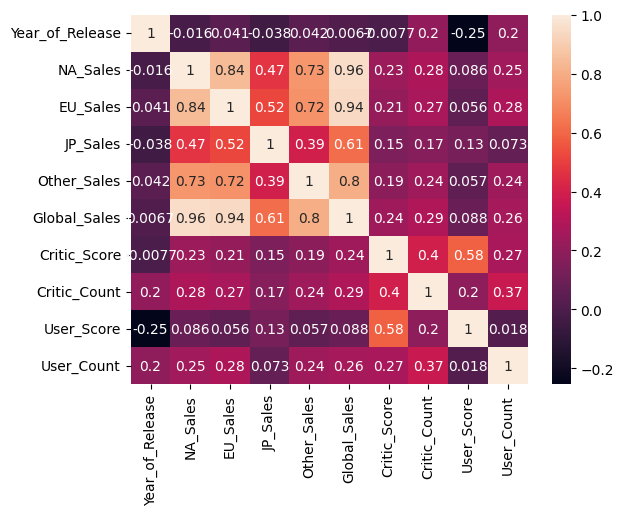

In [8]:
# Generate correlation heatmap
sns.heatmap(df.corr(), annot=True);

In [9]:
### Deep Neural Network ###

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [11]:
# Split the dataset into input and target features. 
y = df['Global_Sales']
X = df.drop('Global_Sales', axis=1)

# Remove NA, EU, JP & Other sales, sinces they are part of Global sales.
X = X.drop('NA_Sales', axis=1)
X = X.drop('EU_Sales', axis=1)
X = X.drop('JP_Sales', axis=1)
X = X.drop('Other_Sales', axis=1)

# Remove all non-parametric features, may not be the best approach, just experimenting atm. 
# TODO: Consider methods of non-parametric -> parametric encoding.
X = X.drop('Name', axis=1)
X = X.drop('Platform', axis=1)
X = X.drop('Genre', axis=1)
X = X.drop('Publisher', axis=1)
X = X.drop('Developer', axis=1)
X = X.drop('Rating', axis=1)

In [12]:
# Split the dataset into training, validation and test sets.
X_train, X_val, X_test = np.split(X, [int(.6*len(X)), int(.8*len(X))])
y_train, y_val, y_test = np.split(y, [int(.6*len(y)), int(.8*len(y))])

In [13]:
# Create a Deep Neural Network models
candidate_models = []
candidate_models.append(
    models.Sequential([
    layers.Flatten(input_shape=(5,)),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1, activation='sigmoid')
]))

candidate_models.append(
    models.Sequential([
    layers.Flatten(input_shape=(5,)),
    layers.Dense(90, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
]))

candidate_models.append(
    models.Sequential([
    layers.Flatten(input_shape=(5,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid')
]))

2023-04-15 16:05:10.343383: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-15 16:05:10.343442: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-AJBO0GEH): /proc/driver/nvidia/version does not exist
2023-04-15 16:05:10.345081: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# Define hyper-parameters
epochs = 2000
learning_rate = 0.001

In [15]:
# Compile models
for model in candidate_models:
    model.compile(
        optimizer=optimizers.Adam(learning_rate=learning_rate), 
        loss=losses.BinaryCrossentropy(),
        metrics=[metrics.BinaryAccuracy()]
    )

** 377.68 seconds.
** 374.68 seconds.
** 421.07 seconds.


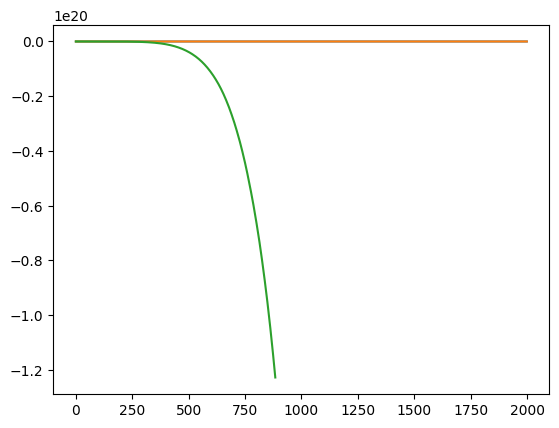

In [16]:
# Train models
for model in candidate_models:
    with utils.Timer():
        history = model.fit(
            X_train, 
            y_train, 
            verbose=0, 
            epochs=epochs, 
            shuffle=True
        )
    plt.plot([i for i in range(epochs)], history.history['loss'])

In [17]:
# Evalute model - training data
for model in candidate_models:
    model.evaluate(X_train, y_train)

128/128 [==============================] - 0s 1ms/step - loss: nan - binary_accuracy: 0.0000e+00


In [18]:
# Evaluate model - validation data
for model in candidate_models:
    model.evaluate(X_val, y_val)

43/43 [==============================] - 0s 1ms/step - loss: nan - binary_accuracy: 0.0000e+00


In [20]:
# Model failed